In [53]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
import joblib

In [4]:
# Reading the datset
data_customer = pd.read_csv("in/CreditCardCustomerData.csv")
data_customer.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
# Data Standarization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_scaled = std.fit_transform(data_customer.iloc[:,2:])
data_scaled

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

K-MEANS CLUSTERING

In [8]:
# Elbow and Silhouette method
sum_sqd_distances = []
silhouette_scores = []
K = range(2,15)  # Number of clusters
for _ in K: 
    km = KMeans(n_clusters = _)
    y = km.fit_predict(data_scaled)
    sum_sqd_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled,y))

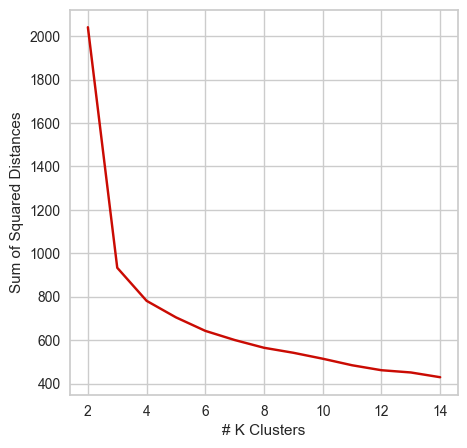

In [21]:
# Elbow chart
fig = plt.figure(figsize=(5,5))

plt.plot(K, sum_sqd_distances, "r")
plt.xlabel("# K Clusters")
plt.ylabel("Sum of Squared Distances")
plt.show()

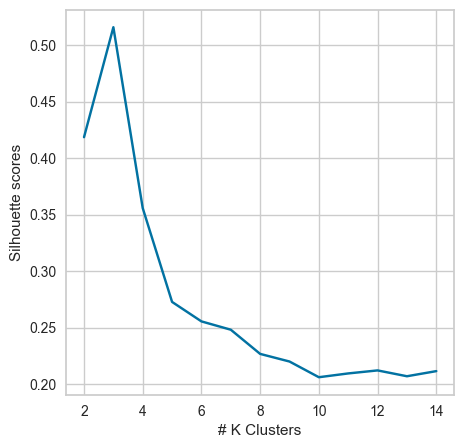

In [17]:
# Silhouette scores chart for KMeans
fig = plt.figure(figsize=(5,5))

plt.plot(K, silhouette_scores)
plt.xlabel("# K Clusters")
plt.ylabel("Silhouette scores")
plt.show()

For K-Means clustering model:
Based on the Elbow chart the best num of clustering for k-means is 4. But, based on Silhouette scores charts the number is 3.

In [22]:
# Let's train 2 k-means models. One with 3 clusters and anotherone with 4 clusters.
km1 = KMeans(n_clusters=4)
km2 = KMeans(n_clusters=3)

nkm1 = km1.fit_predict(data_scaled)
nkm2 = km2.fit_predict(data_scaled)

# Save them on the initial dataframe
data_customer["Kmeans_1"] = nkm1
data_customer["Kmeans_2"] = nkm2

HIERARCHICAL CLUSTERING

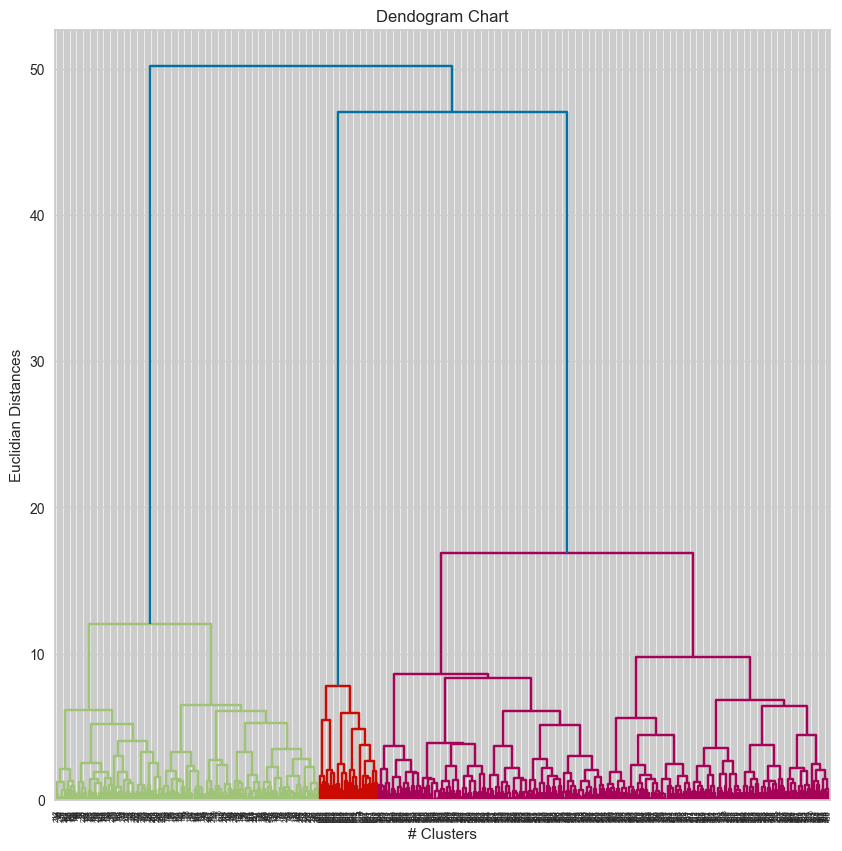

In [29]:
# Dendogram chart
fig = plt.figure(figsize=(10,10))
dendogram_chart = dendrogram(linkage(data_scaled, method="ward"))
plt.title("Dendogram Chart")
plt.xlabel("# Clusters")
plt.ylabel("Euclidian Distances")
plt.show()

In [30]:
# Silhouette method
silhouette_scores2 = []
K = range(2,15)  # Number of clusters
for _ in K: 
    hc = AgglomerativeClustering(n_clusters=_, affinity='euclidean', linkage='ward')
    y2 = hc.fit_predict(data_scaled)
    silhouette_scores2.append(silhouette_score(data_scaled,y2))

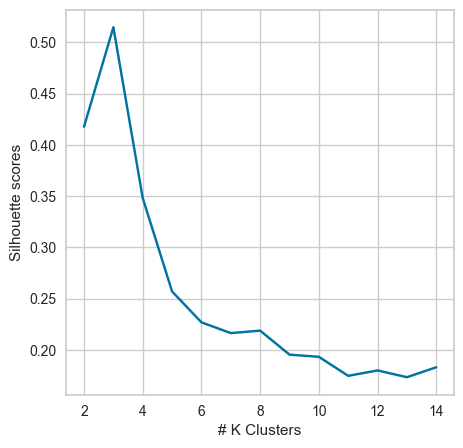

In [31]:
# Silhouette scores chart for Hierarchical
fig = plt.figure(figsize=(5,5))

plt.plot(K, silhouette_scores2)
plt.xlabel("# K Clusters")
plt.ylabel("Silhouette scores")
plt.show()

For Hierarchical clustering model:
Based on the Dendogram chart the best number of clustering for k-means is 3. Equally, based on Silhouette scores charts the number of clustering is 3.

In [34]:
# Let's train a single model with 3 cluster for Hierarchical.
hc1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
nhc1 = hc1.fit_predict(data_scaled)

# Save it on the initial dataframe
data_customer["Hierar_1"] = nhc1

In [37]:
data_customer.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_1,Kmeans_2,Hierar_1
0,1,87073,100000,2,1,1,0,2,1,0
1,2,38414,50000,3,0,10,9,1,2,1
2,3,17341,50000,7,1,3,4,2,1,0
3,4,40496,30000,5,1,1,4,2,1,0
4,5,47437,100000,6,0,12,3,3,0,2


Evaluating the final results

In [38]:
data_customer.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'Kmeans_1', 'Kmeans_2', 'Hierar_1'],
      dtype='object')

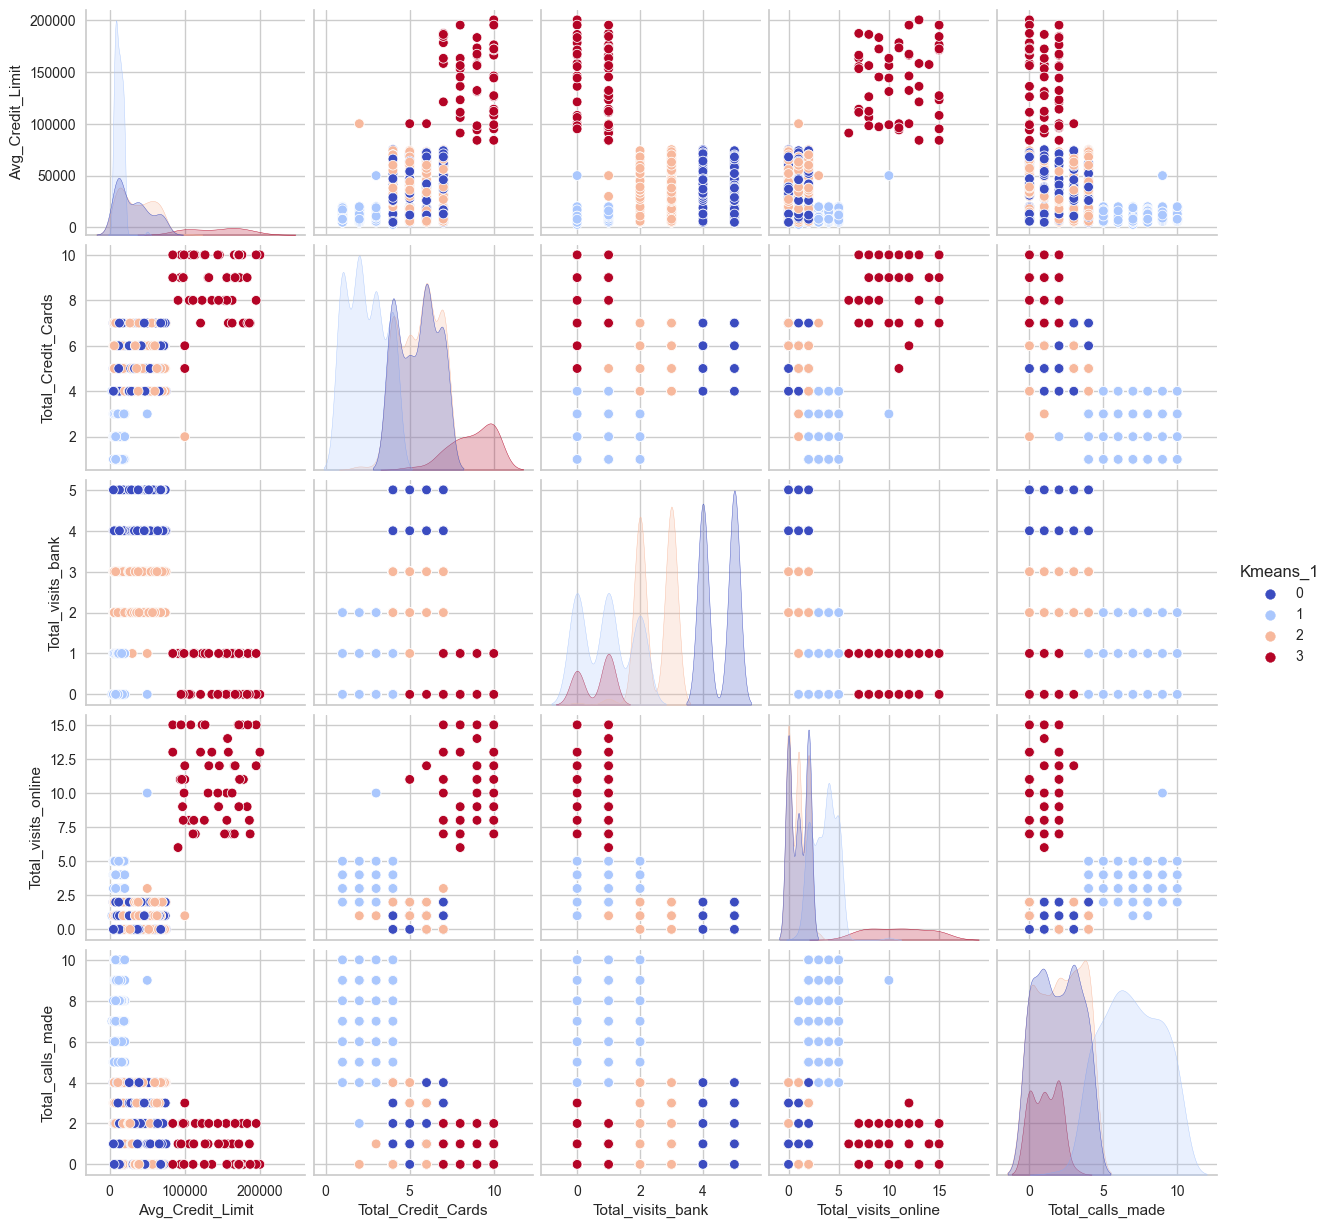

In [39]:
# Pairplot splitting for Kmeans #1 (4 Cluster)
sns.pairplot(data = data_customer[['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'Kmeans_1']], hue='Kmeans_1', palette='coolwarm')

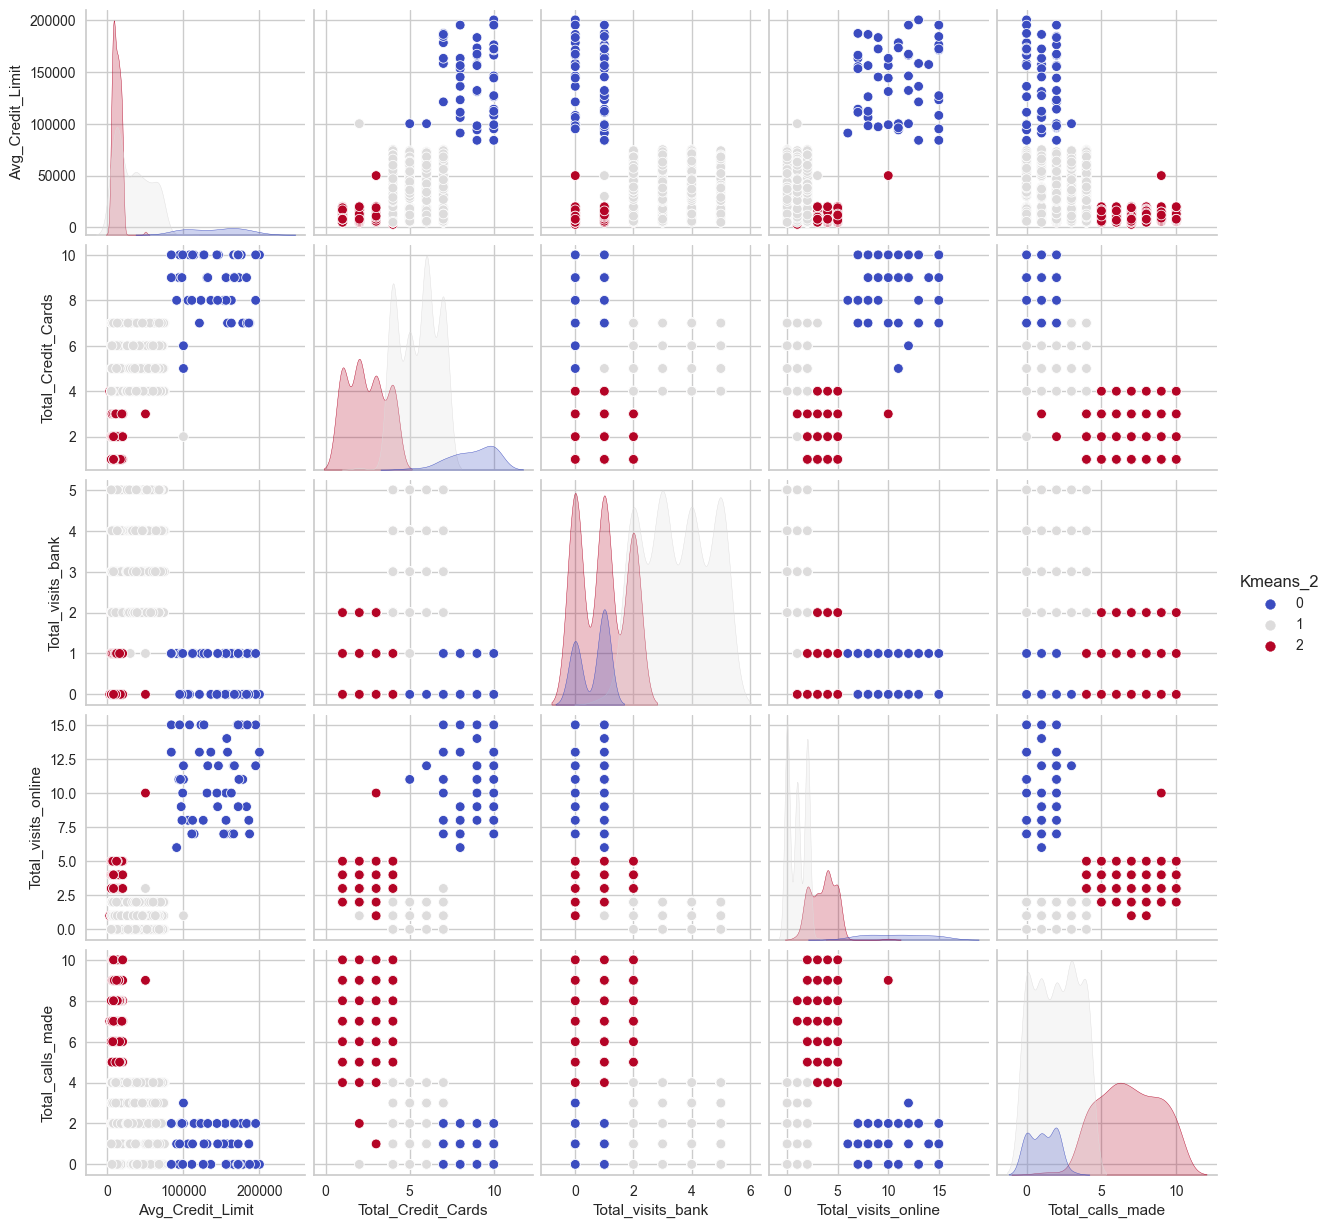

In [40]:
# Pairplot splitting for Kmeans #2 (4 Cluster)
sns.pairplot(data = data_customer[['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
        'Kmeans_2']], hue='Kmeans_2', palette='coolwarm')

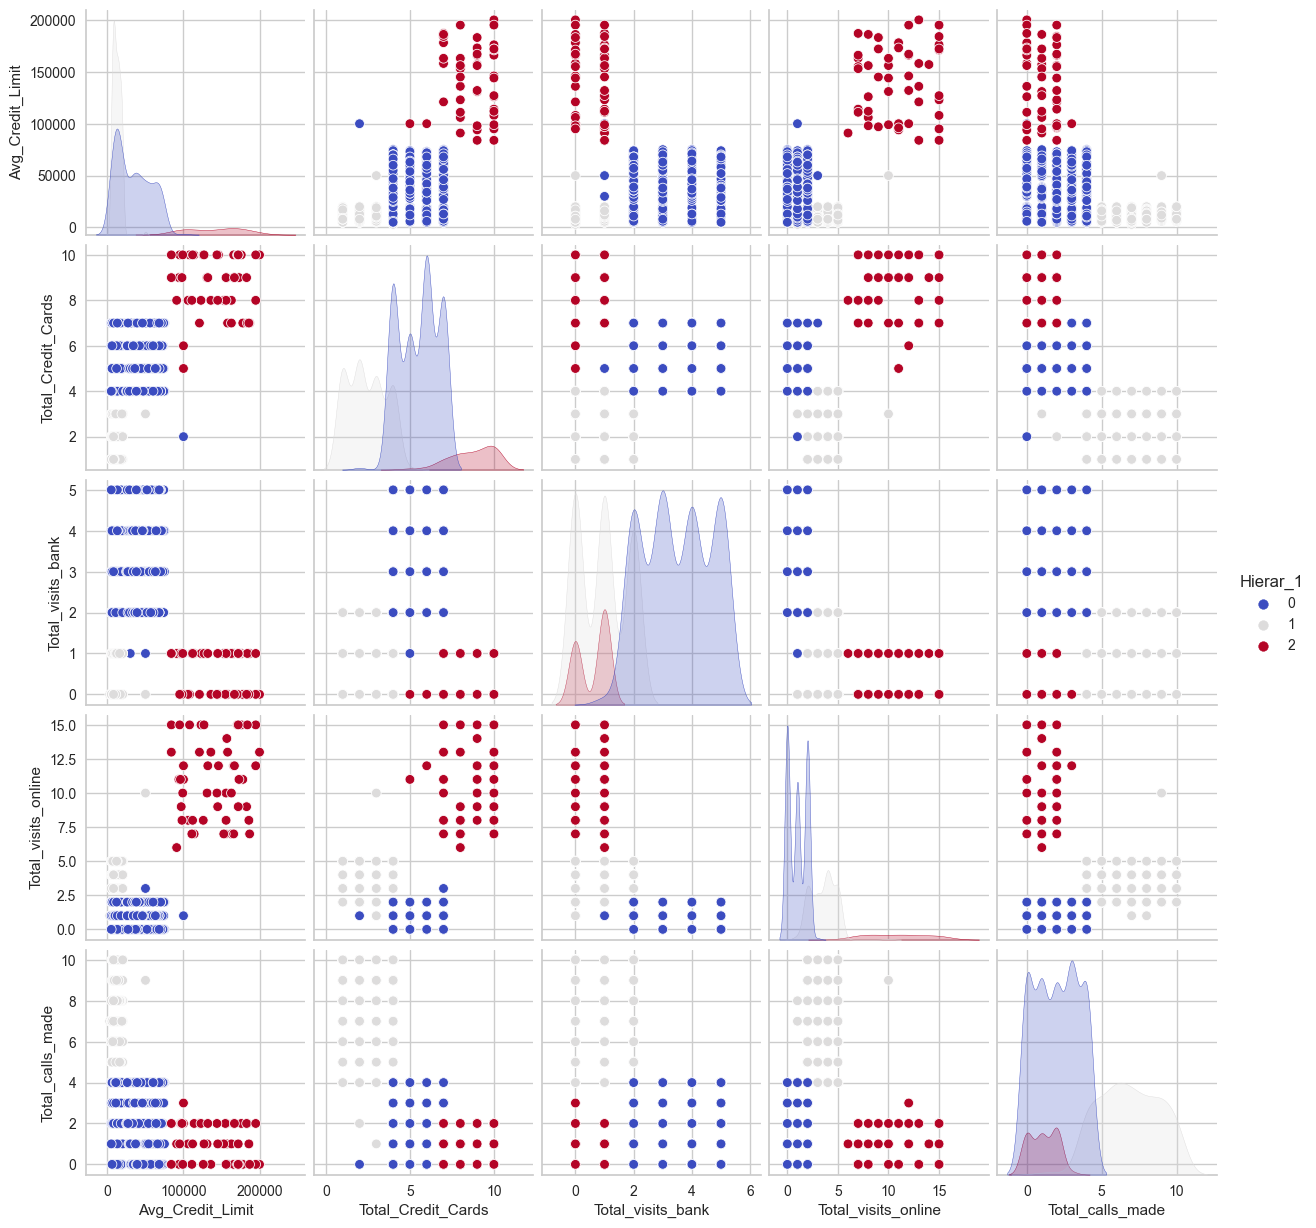

In [41]:
# Pairplot splitting for Hierarchical (4 Cluster)
sns.pairplot(data = data_customer[['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'Hierar_1']], hue='Hierar_1', palette='coolwarm')

The Charts show that the best numer of cluster to define the customers segmentation is 3.
So, lets compare k-means2 and Hierachical.

In [43]:
# Final comparasion (It´s almost the same)
print('The score for Kmeans is: ', silhouette_score(data_scaled,nkm2)) 
print('The score for Hierarchical is: ', silhouette_score(data_scaled,nhc1)) 

The score for Kmeans is:  0.5157182558881063
The score for Hierarchical is:  0.5147639589977819


In [44]:
data_customer.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'Kmeans_1', 'Kmeans_2', 'Hierar_1'],
      dtype='object')

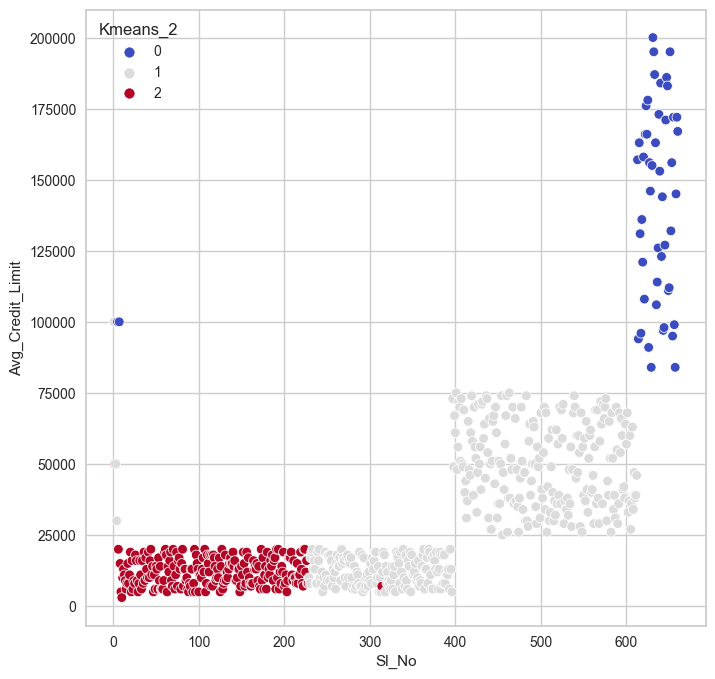

In [48]:
# Conclude using Kmeans model
# Comparation between Customers ID and their credit limit
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=data_customer, x='Sl_No',y='Avg_Credit_Limit', hue='Kmeans_2', palette='coolwarm')
plt.show()

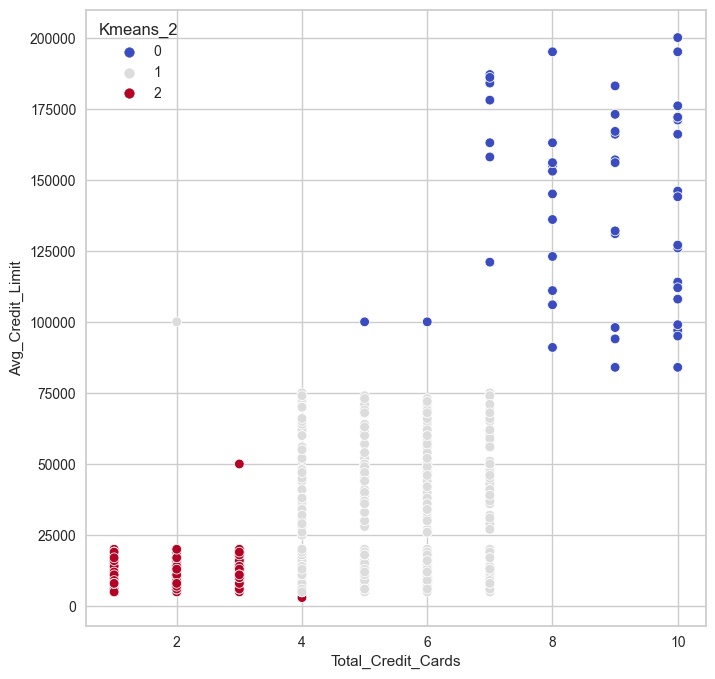

In [49]:
# Comparation between the numer of credit cards and their credit limit
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=data_customer, x="Total_Credit_Cards",y='Avg_Credit_Limit', hue='Kmeans_2', palette='coolwarm')
plt.show()

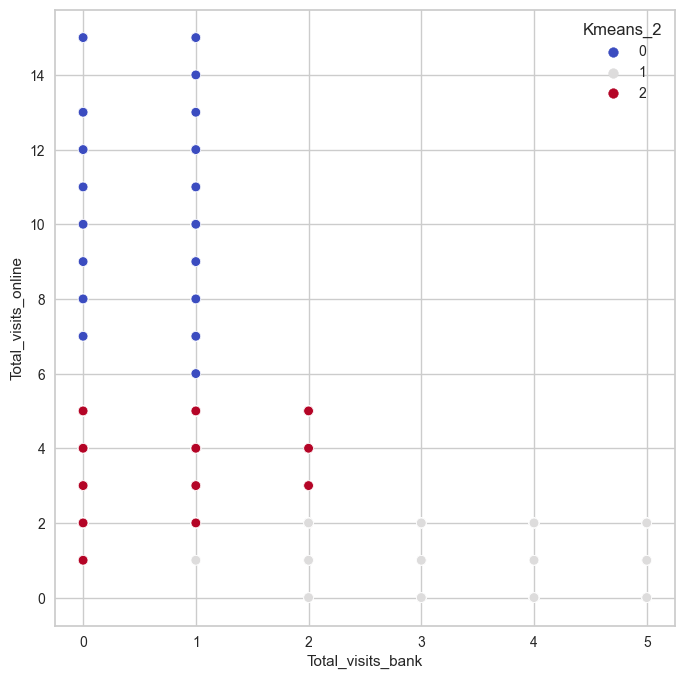

In [52]:
# Comparation between the numer of visits online and visits bank
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=data_customer, x='Total_visits_bank',y='Total_visits_online', hue='Kmeans_2', palette='coolwarm')
plt.show()

The three graphs above show us:
1. How the custmores behaviors are divided among the amount of credit. So, the credit limit is a importan variable to describe how the customer use the bank services.
2. The customer with the higher credit limit are the customer with the most number of credit cards.
3. The clientes who most visit the bank via online, don't visit the physic branches. So, here might be a segmentation by age. But, in this case I don´t have the age per customer.

And keeping with this analysis, It's possible to find more patterns in the clientes.

In [56]:
# Saving the final resources

# DataFrame
df_copy = data_customer.copy()
df_copy = df_copy.drop('Kmeans_1', axis=1)
df_copy = df_copy.drop('Hierar_1', axis=1)
df_copy.to_csv("./out/final_customer_data.csv")

# Clustering model
joblib.dump(nkm2, './out/Clustering_model.pkl')

['./out/Clustering_model.pkl']